In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
os.getcwd()

'E:\\All My Projects\\Machine Learning\\EDA,Classification,Regression'

In [4]:
#load the dataset and get the first 5 rows

df_loans = pd.read_csv('Loan Status.csv',low_memory=False)
df_loans.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [6]:
#shape of the dataset

df_loans.shape

(256984, 19)

In [7]:
#Renaming the columns with no space.

df_loans.rename(columns={
    'Loan ID':'Loan_ID', 'Customer ID':'Customer_ID', 'Loan Status':'Loan_Status', 'Current Loan Amount':'Current_Loan_Amount',
       'Credit Score':'Credit_Score', 'Years in current job':'Years_in_current_job', 'Home Ownership':'Home_Ownership',
       'Annual Income':'Annual_Income','Monthly Debt':'Monthly_Debt', 'Years of Credit History':'Years_of_Credit_History',
       'Months since last delinquent':'Months_since_last_delinquent', 'Number of Open Accounts':'Number_of_Open_Accounts',
       'Number of Credit Problems':'Number_of_Credit_Problems', 'Current Credit Balance':'Current_Credit_Balance',
       'Maximum Open Credit':'Maximum_Open_Credit','Tax Liens':'Tax_Liens'
}, inplace=True)

In [8]:
#columns in the dataset

df_loans.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Years_in_current_job', 'Home_Ownership',
       'Annual_Income', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [9]:
#numeric columns in the dataset

df_loans.select_dtypes(include='number').columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
       'Years_of_Credit_History', 'Months_since_last_delinquent',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [10]:
#datatypes of the columns 

df_loans.dtypes

Loan_ID                          object
Customer_ID                      object
Loan_Status                      object
Current_Loan_Amount               int64
Term                             object
Credit_Score                    float64
Years_in_current_job             object
Home_Ownership                   object
Annual_Income                   float64
Purpose                          object
Monthly_Debt                     object
Years_of_Credit_History         float64
Months_since_last_delinquent    float64
Number_of_Open_Accounts           int64
Number_of_Credit_Problems         int64
Current_Credit_Balance            int64
Maximum_Open_Credit              object
Bankruptcies                    float64
Tax_Liens                       float64
dtype: object

In [11]:
#column index, non-null count, datatypes

df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan_ID                       256984 non-null  object 
 1   Customer_ID                   256984 non-null  object 
 2   Loan_Status                   256984 non-null  object 
 3   Current_Loan_Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit_Score                  195308 non-null  float64
 6   Years_in_current_job          245508 non-null  object 
 7   Home_Ownership                256984 non-null  object 
 8   Annual_Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly_Debt                  256984 non-null  object 
 11  Years_of_Credit_History       256984 non-null  float64
 12  Months_since_last_delinquent  116601 non-nul

In [12]:
#descriptive statistics of each numerical column

df_loans.describe()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [13]:
#summary statistics for the categorical (non-numeric) columns

df_loans.describe(include='object')

,Loan_ID,Customer_ID,Loan_Status,Term,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Maximum_Open_Credit
count,256984,256984,256984,256984,245508,256984,256984,256984,256984
unique,215700,215700,2,2,11,4,10,129115,68987
top,3f6bd37a-b0bc-4d85-93c7-eea53df601fb,a96104f4-2f44-4112-82b9-75605d44dac3,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,$0.00,0
freq,4,4,176191,192632,78896,124477,203911,254,1831


In [14]:
#duplicate rows in the dataset

df_loans.duplicated().sum()

16611

In [15]:
#unique values in the Loan_Status

df_loans['Loan_Status'].value_counts()

Loan_Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

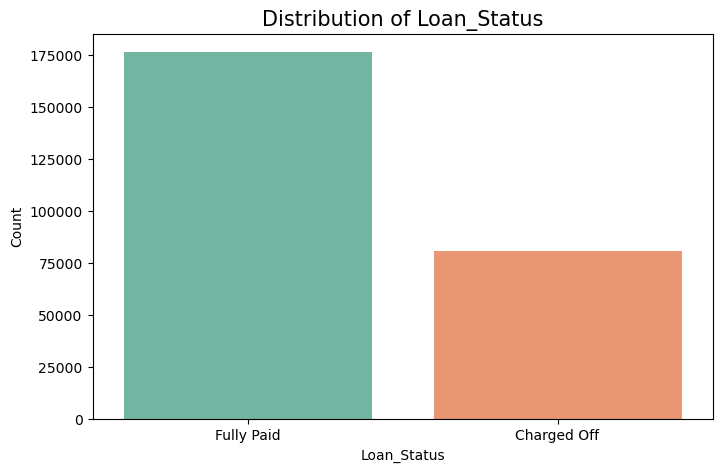

In [16]:
#distribution of loan status

Loan_Status = ['Loan_Status']
for column in Loan_Status:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df_loans, hue=column, palette='Set2',legend=False)
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [17]:
#missing values in the dataset

missing_values = df_loans.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Credit_Score                     61676
Years_in_current_job             11476
Annual_Income                    61676
Months_since_last_delinquent    140383
Bankruptcies                       529
Tax_Liens                           23
dtype: int64

In [18]:
#percentage of missing values in the dataset

percentage_missing_values = df_loans.isna().sum()/df_loans.shape[0] * 100
missing_values = percentage_missing_values[percentage_missing_values > 0]
missing_values

Credit_Score                    23.999938
Years_in_current_job             4.465648
Annual_Income                   23.999938
Months_since_last_delinquent    54.627136
Bankruptcies                     0.205849
Tax_Liens                        0.008950
dtype: float64

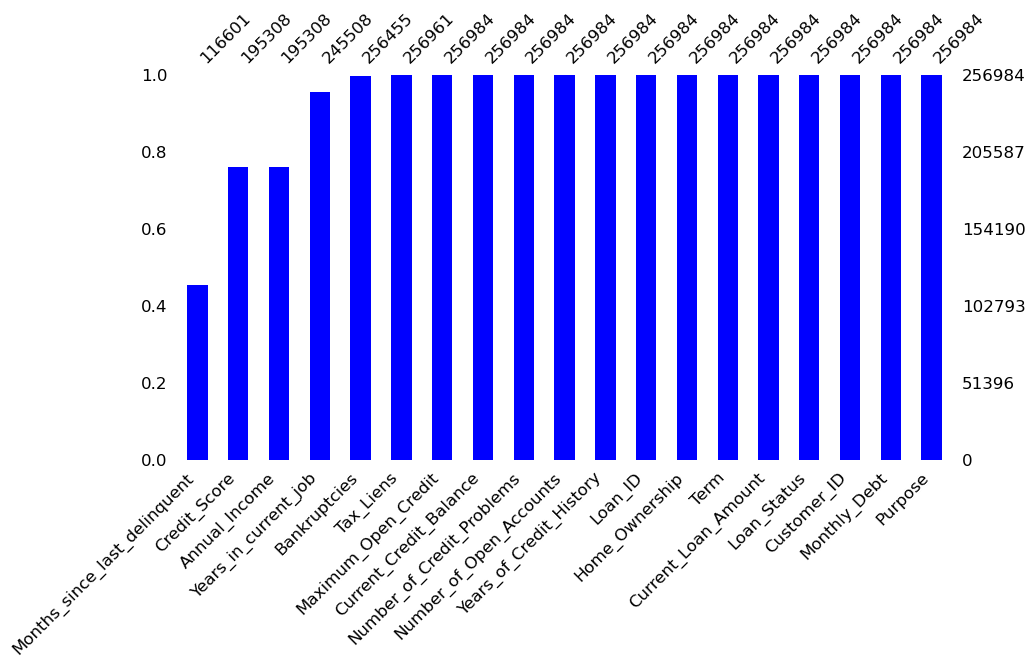

In [19]:
#visualization of the missing values

missingno.bar(df_loans, color="blue", sort="ascending", figsize=(10,5), fontsize=12);

In [20]:
#missing value treatment of three columns - Bankruptcies,Tax_Liens,Months_since_last_delinquent

df_loans.fillna({'Bankruptcies': 0}, inplace=True)
df_loans.fillna({'Tax_Liens': 0}, inplace=True)
df_loans.fillna({'Months_since_last_delinquent': 0}, inplace=True)

In [21]:
missing_values = df_loans.isnull().sum()
missing_values

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    61676
Years_in_current_job            11476
Home_Ownership                      0
Annual_Income                   61676
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent        0
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                        0
Tax_Liens                           0
dtype: int64

In [23]:
#missing value treatement using median for the column - Annual Income

median_annual_income = df_loans['Annual_Income'].median()
df_loans['Annual_Income'] = df_loans['Annual_Income'].fillna(median_annual_income)

In [24]:
missing_values = df_loans.isnull().sum()
missing_values

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    61676
Years_in_current_job            11476
Home_Ownership                      0
Annual_Income                       0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent        0
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                        0
Tax_Liens                           0
dtype: int64

In [25]:
#unique values in the Years in current job

df_loans.Years_in_current_job.value_counts()

Years_in_current_job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [26]:
#missing values treatment of Years in current job using mode

mode_years_job = df_loans['Years_in_current_job'].mode()[0]
df_loans['Years_in_current_job'] = df_loans['Years_in_current_job'].fillna(mode_years_job)

In [27]:
missing_values = df_loans.isnull().sum()
missing_values

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    61676
Years_in_current_job                0
Home_Ownership                      0
Annual_Income                       0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent        0
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                        0
Tax_Liens                           0
dtype: int64

In [28]:
#filter out the rows which have excessively high credit scores above 850 while still preserving those that have missing credit score information.

df_loans = df_loans[(df_loans['Credit_Score'].isnull()) | (df_loans['Credit_Score']<= 850)]

In [29]:
#missing values treatment of Credit Score using median

median_cred = df_loans['Credit_Score'].median()
df_loans['Credit_Score'] = df_loans['Credit_Score'].fillna(median_cred)

In [133]:
missing_values = df_loans.isnull().sum()
missing_values

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Years_in_current_job            0
Home_Ownership                  0
Annual_Income                   0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

In [30]:
#shape of the dataset after removing excessively high credit scores above 850

df_loans.shape

(240797, 19)

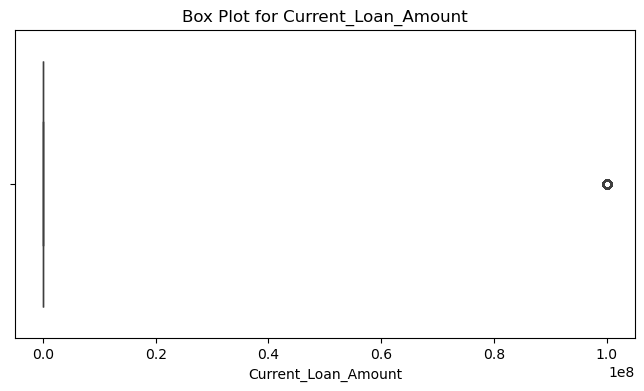

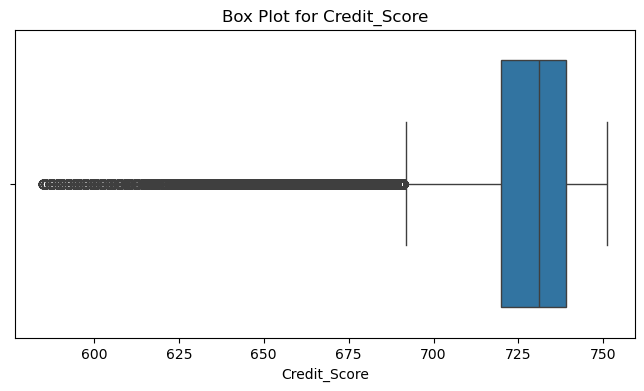

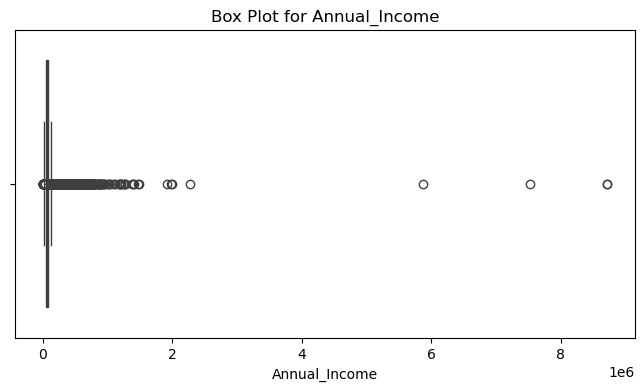

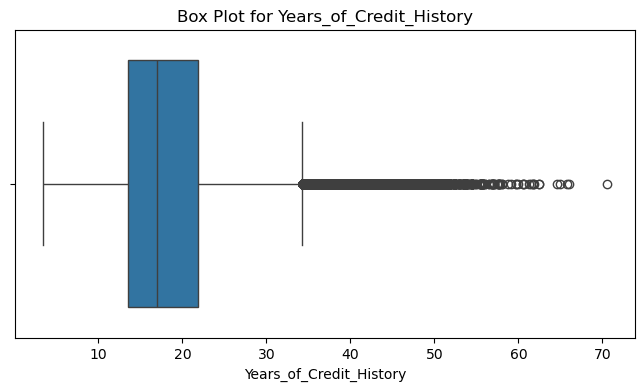

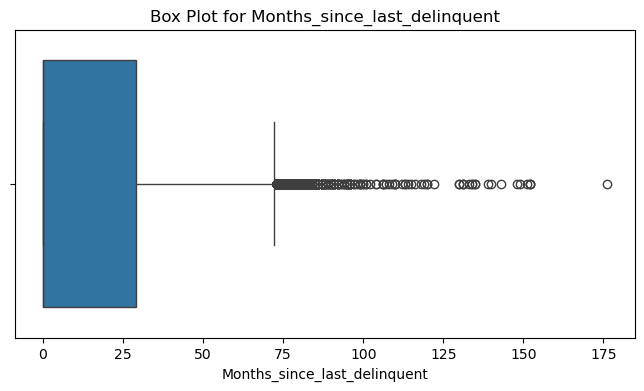

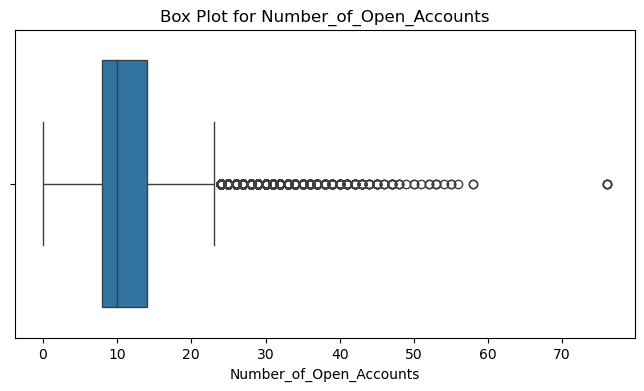

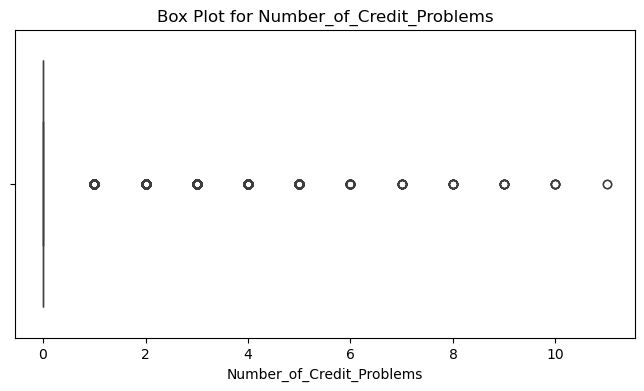

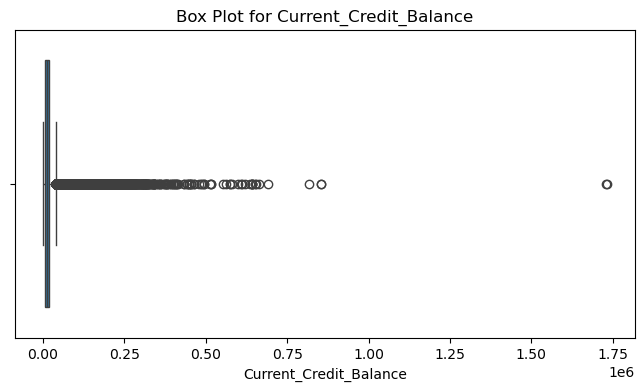

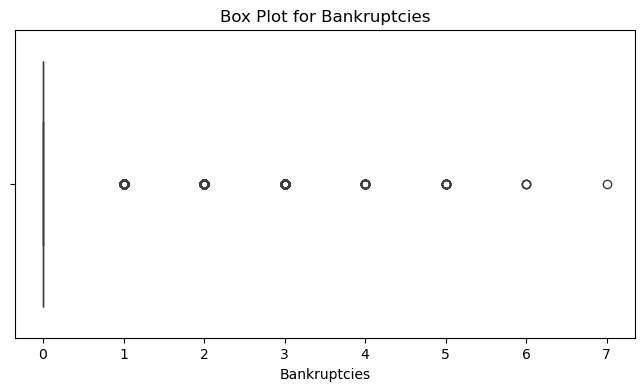

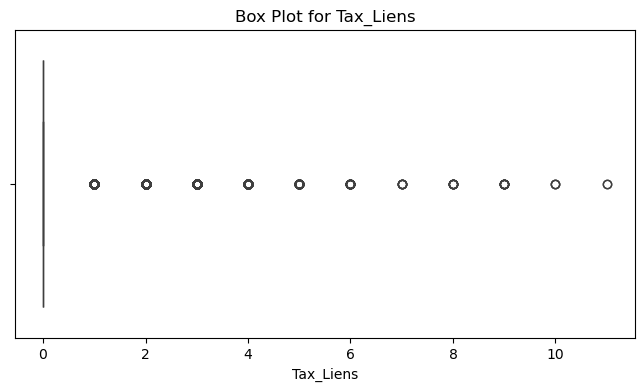

In [31]:
#plotting the outliers using IQR method

numerical_cols = df_loans.select_dtypes(include=['int64', 'float64']).columns
df_no_outliers = df_loans
for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_loans[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [32]:
#capping the outliers
for col in numerical_cols:
    Q1 = df_loans[col].quantile(0.25)
    Q3 = df_loans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_loans[col] = np.where(df_loans[col] < lower_bound, lower_bound, df_loans[col])
    df_loans[col] = np.where(df_loans[col] > upper_bound, upper_bound, df_loans[col])

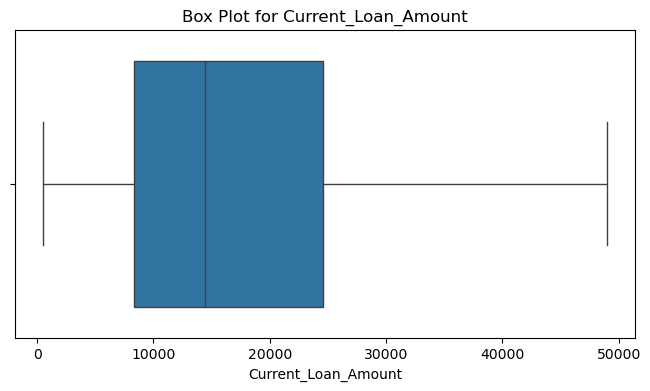

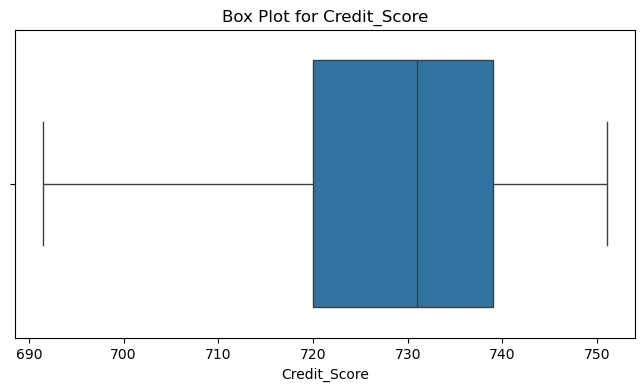

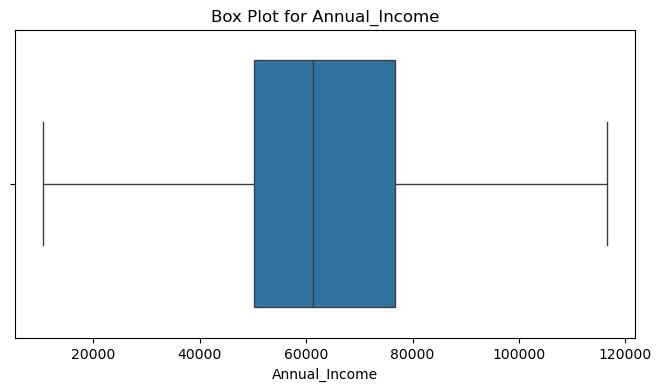

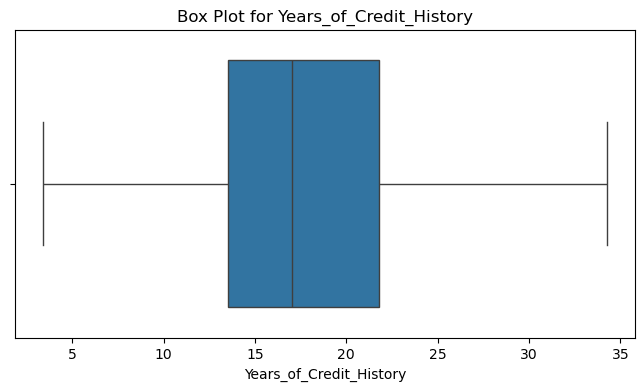

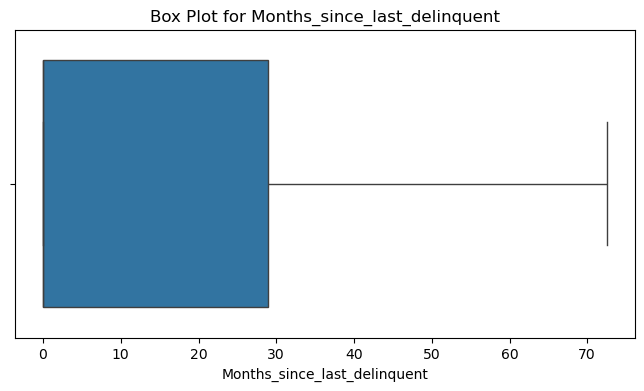

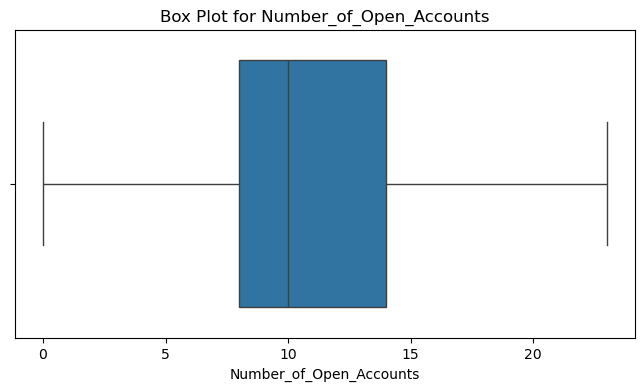

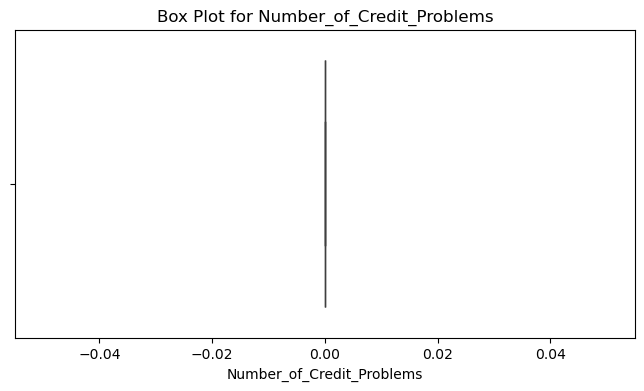

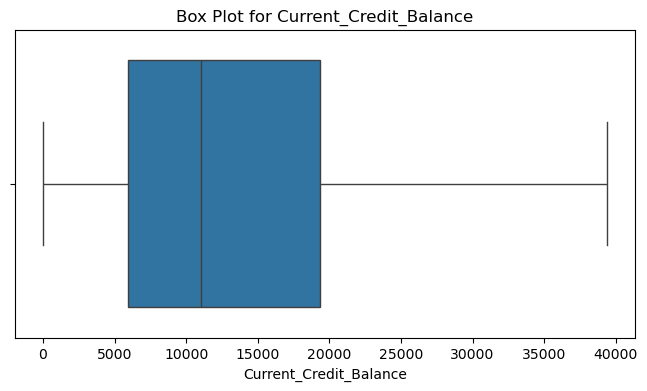

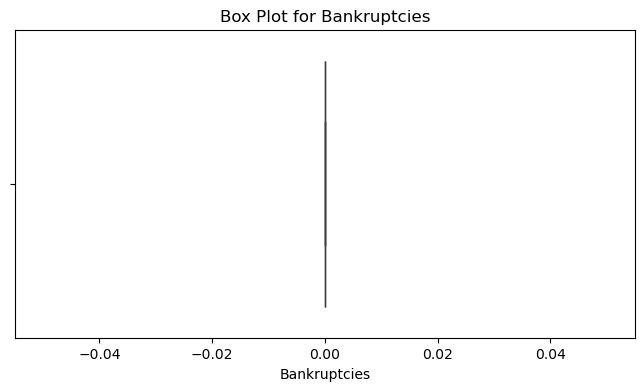

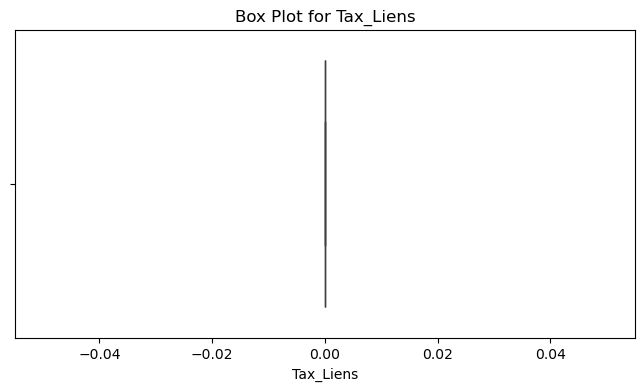

In [137]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_loans[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

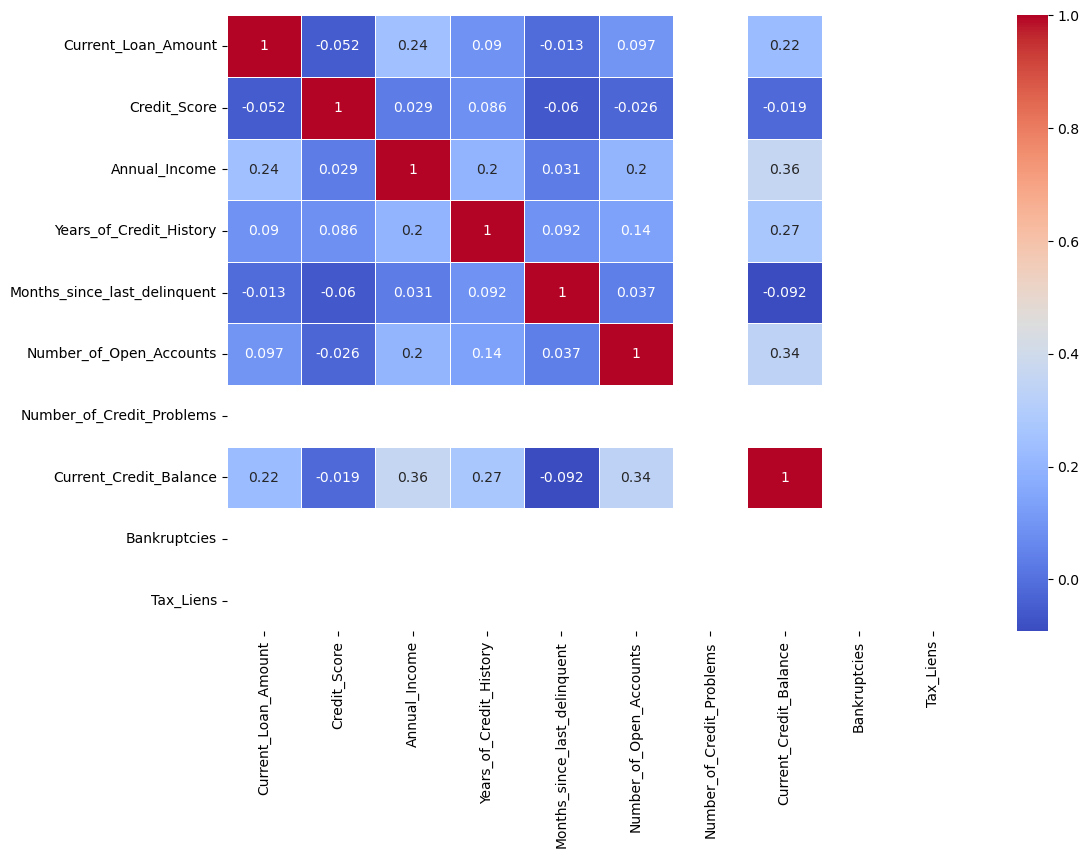

In [33]:
#correlation between numeric columns using a heatmap

numeric_cols = df_loans.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

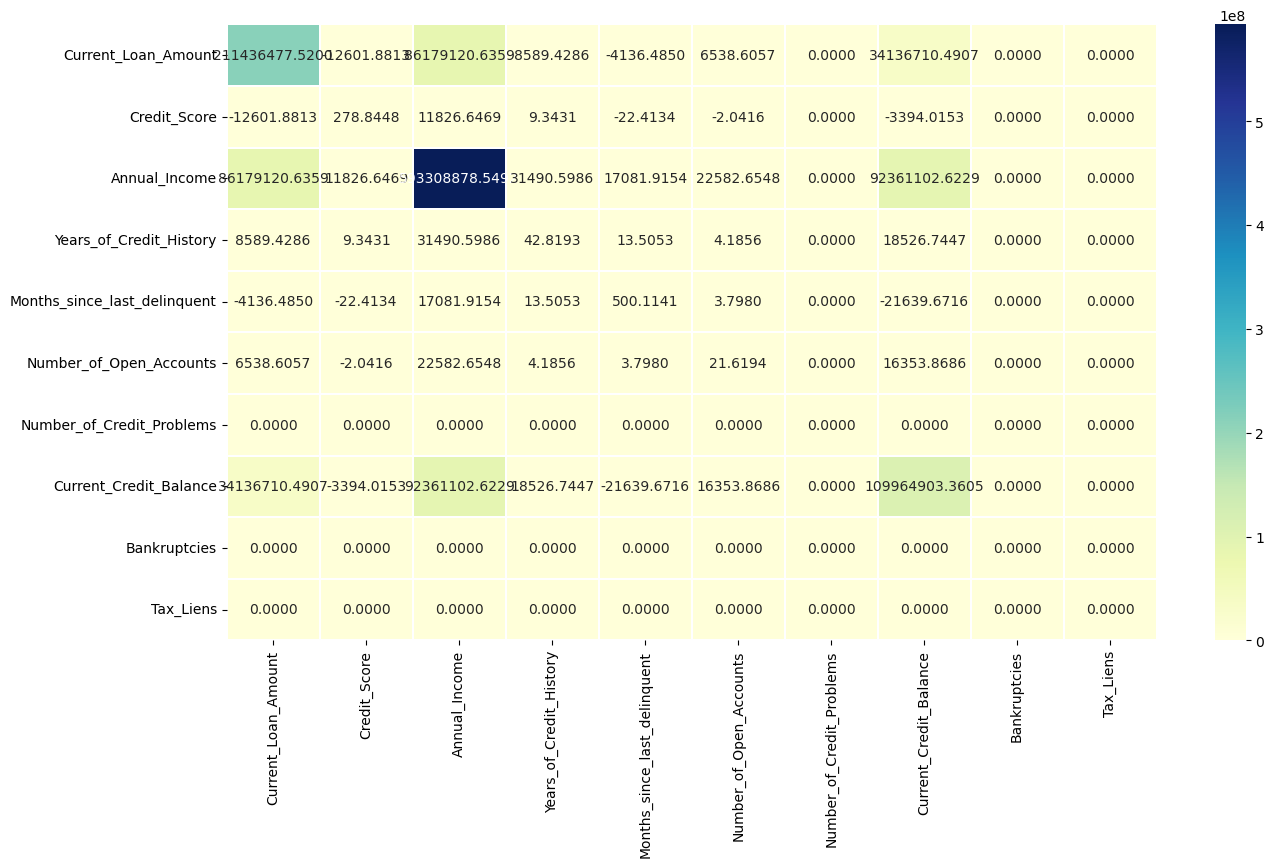

In [34]:
#covariance between numeric columns using a heatmap

numeric_cols = df_loans.select_dtypes(include=['float64', 'int64'])
covariance= numeric_cols.cov()
fig,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(covariance, annot = True, linewidths = 0.05, cmap = "YlGnBu", fmt = '.4f')
plt.show()

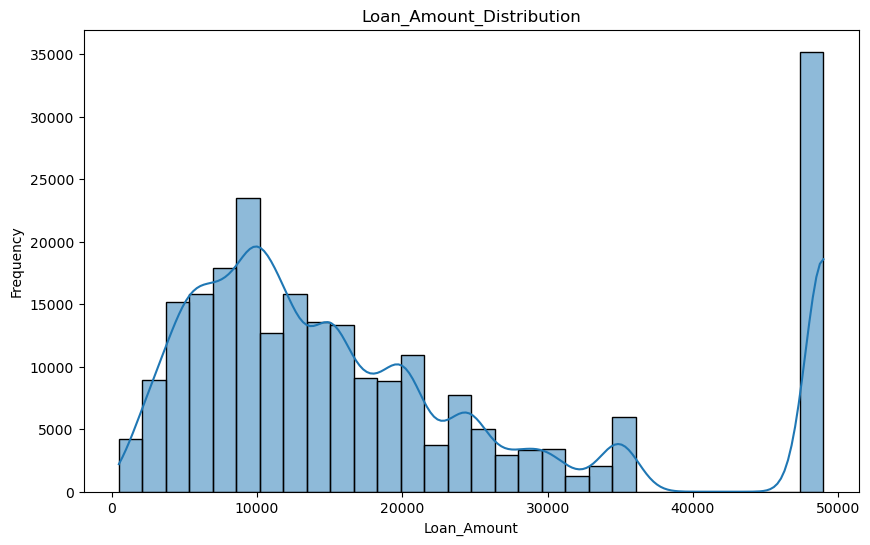

In [36]:
# What is the distribution of the Current_Loan_Amount?

plt.figure(figsize=(10, 6))
sns.histplot(df_loans['Current_Loan_Amount'], kde=True, bins=30)
plt.title('Loan_Amount_Distribution')
plt.xlabel('Loan_Amount')
plt.ylabel('Frequency')
plt.show()

In [37]:
# How does Loan_Status vary by Term (e.g., short-term vs. long-term)?

crosstab_result = pd.crosstab(df_loans['Loan_Status'], df_loans['Term'], margins=True)
print(crosstab_result)

Term         Long Term  Short Term     All
Loan_Status                               
Charged Off      23870       40736   64606
Fully Paid       34619      141572  176191
All              58489      182308  240797


In [38]:
# What are the most common purposes for loans in terms of frequency?

purpose_counts = df_loans['Purpose'].value_counts()
print(purpose_counts)

Purpose
Debt Consolidation      191039
Home Improvements        14087
other                    13291
Other                     9134
Business Loan             4276
Buy a Car                 3138
Medical Bills             2669
Take a Trip               1480
Buy House                 1430
Educational Expenses       253
Name: count, dtype: int64


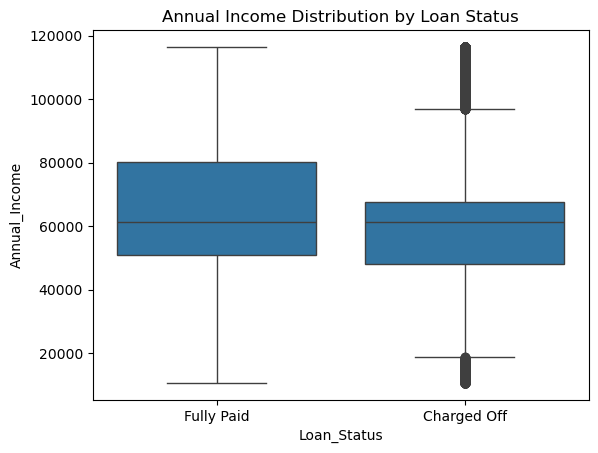

In [39]:
# What is the distribution of Annual_Income among different loan statuses?

sns.boxplot(x='Loan_Status', y='Annual_Income', data=df_loans)
plt.title('Annual Income Distribution by Loan Status')
plt.show()

In [41]:
# What is the average Years_of_Credit_History for borrowers with different Home_Ownership statuses?
average_credit_history = df_loans.groupby('Home_Ownership')['Years_of_Credit_History'].mean()
print(average_credit_history)

Home_Ownership
HaveMortgage     19.013670
Home Mortgage    19.396401
Own Home         18.742319
Rent             16.553255
Name: Years_of_Credit_History, dtype: float64


In [45]:
# How many loans are taken out for each Purpose, and what is their average loan amount?
loan_summary = df_loans.groupby('Purpose').agg(Number_of_Loans=('Current_Loan_Amount', 'count'), 
Average_Loan_Amount=('Current_Loan_Amount', 'mean')).reset_index()
print(loan_summary)

                Purpose  Number_of_Loans  Average_Loan_Amount
0         Business Loan             4276         19169.055075
1             Buy House             1430         20284.985664
2             Buy a Car             3138         14821.265615
3    Debt Consolidation           191039         19615.622148
4  Educational Expenses              253         14063.768775
5     Home Improvements            14087         19455.792078
6         Medical Bills             2669         14575.402773
7                 Other             9134         16158.884935
8           Take a Trip             1480         12216.683108
9                 other            13291         15063.739561


In [44]:
# train and test slipt

df_loans['Loan_Status'] = df_loans['Loan_Status'].map({'Fully Paid': 1, 'Charged Off': 0})
X = df_loans.drop('Loan_Status', axis=1)
y = df_loans['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Train data shape: (192637, 18)
Test data shape: (48160, 18)
